<a href="https://colab.research.google.com/github/Geethasaran/E-Commerce-_Employee-Attrition-Rate/blob/main/FINAL_PROJECT_Employee_Attrition_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Aim:**

The objective of this project is to help a company understand employee attrition within their organization in order to minimize the attrition rate, reduce turnover costs, and improve employee retention.

In [7]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geethasaran/E-Commerce-_Employee-Attrition-Rate/refs/heads/main/Attrition%20Data.csv')

In [3]:
df.shape

(1470, 13)

In [4]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [5]:
df.tail()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9
1469,34,No,Research & Development,8,3,Medical,2,3,Married,4404,2,4,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


**Exploratory Data Analysis (EDA)**

**Check for Missing Values:**

In [ ]:
print(df.isnull().sum())


Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64


Target Variable Distribution (Attrition):

**Attrition Analysis**

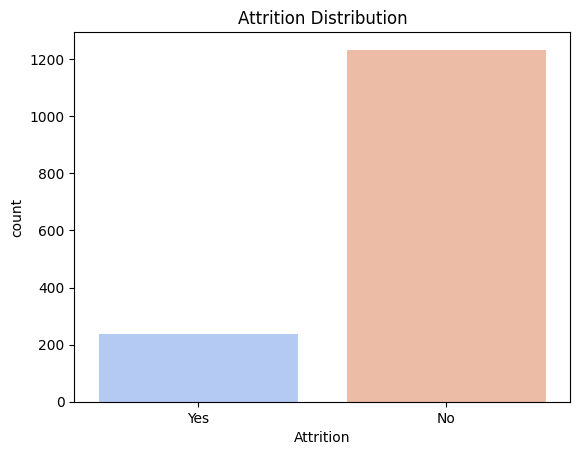

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Attrition', data=df, hue='Attrition', palette='coolwarm', legend=False)
plt.title("Attrition Distribution")
plt.show()



In [18]:
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_rate)


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


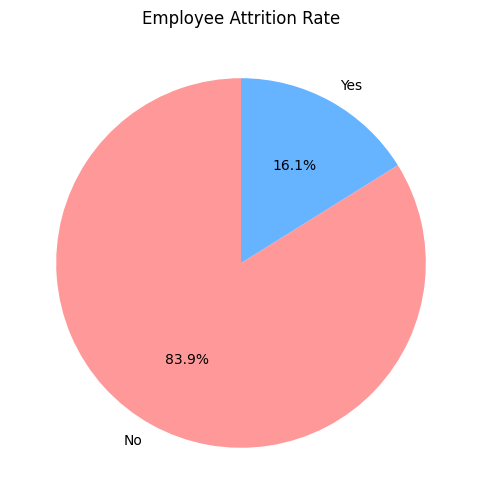

In [22]:
import matplotlib.pyplot as plt

attrition_rate = df['Attrition'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
attrition_rate.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Employee Attrition Rate')
plt.ylabel('')
plt.show()


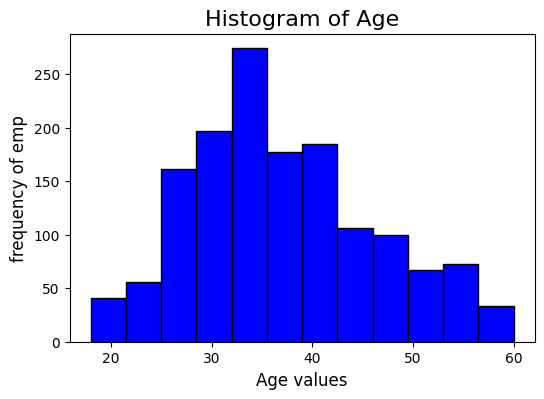

In [13]:
df.hist(column="Age",
         grid=False,
         figsize=(6,4),
         color="blue",
         edgecolor="black",
         bins=12)

plt.xlabel("Age values",fontsize=12)
plt.ylabel("frequency of emp",fontsize=12)
plt.title("Histogram of Age",fontsize=16)

plt.show()

Most of the employees, who have been a part of the company, tend to fall in the age range from 25 years to 45 years.

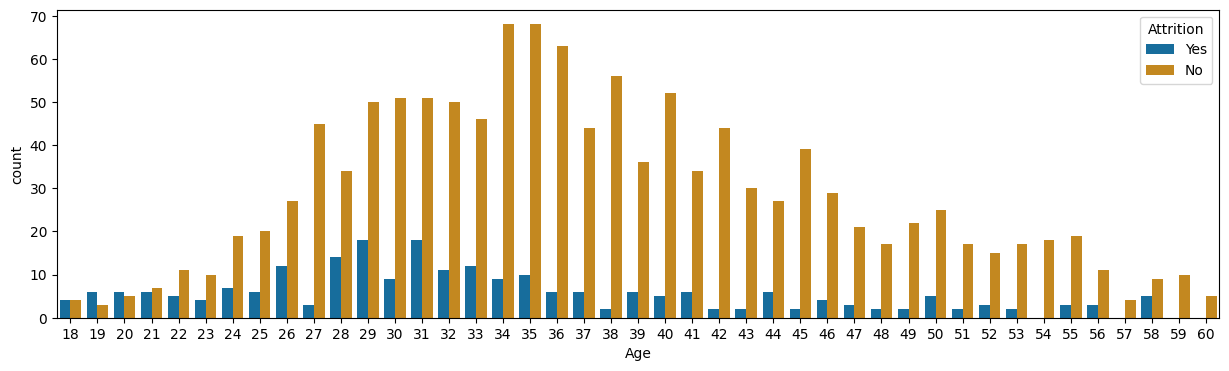

In [11]:
plt.subplots (figsize=(15,4))
sns.countplot (x='Age',  hue='Attrition', data= df, palette = 'colorblind')
plt.show()

In the above plot we can see that affirmative attrition count is higher in late 20 and early 30s¶

Major Attrition occured among the mid-career level employees. Career change and career growth could be one of the possibilities for such an attrition levels.

**Numerical Features Analysis:**


Use histograms to analyze numerical features like Age, MonthlyIncome, and YearsAtCompany.

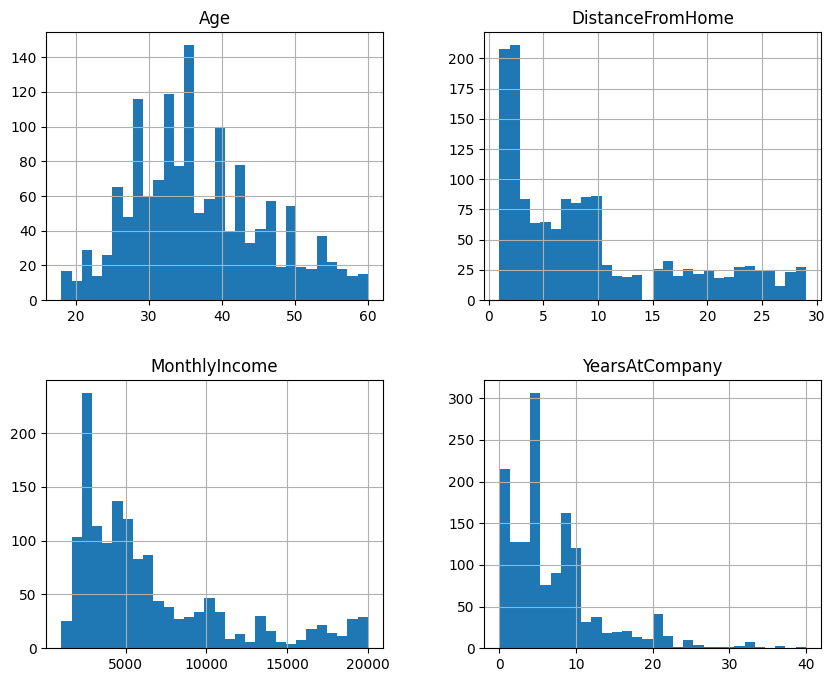

In [ ]:
numerical_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']
df[numerical_cols].hist(bins=30, figsize=(10, 8))
plt.show()


**Categorical Features Analysis:**




Use bar plots for features like Department, MaritalStatus, and EducationField.
python

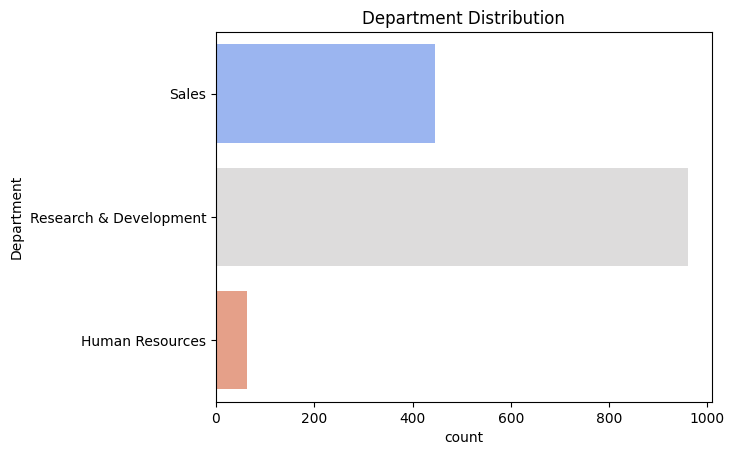

In [ ]:
sns.countplot(y='Department', data=df, hue='Department', palette='coolwarm', legend=False)
plt.title("Department Distribution")
plt.show()


**Correlation Heatmap:**
Check for correlations among numerical features:

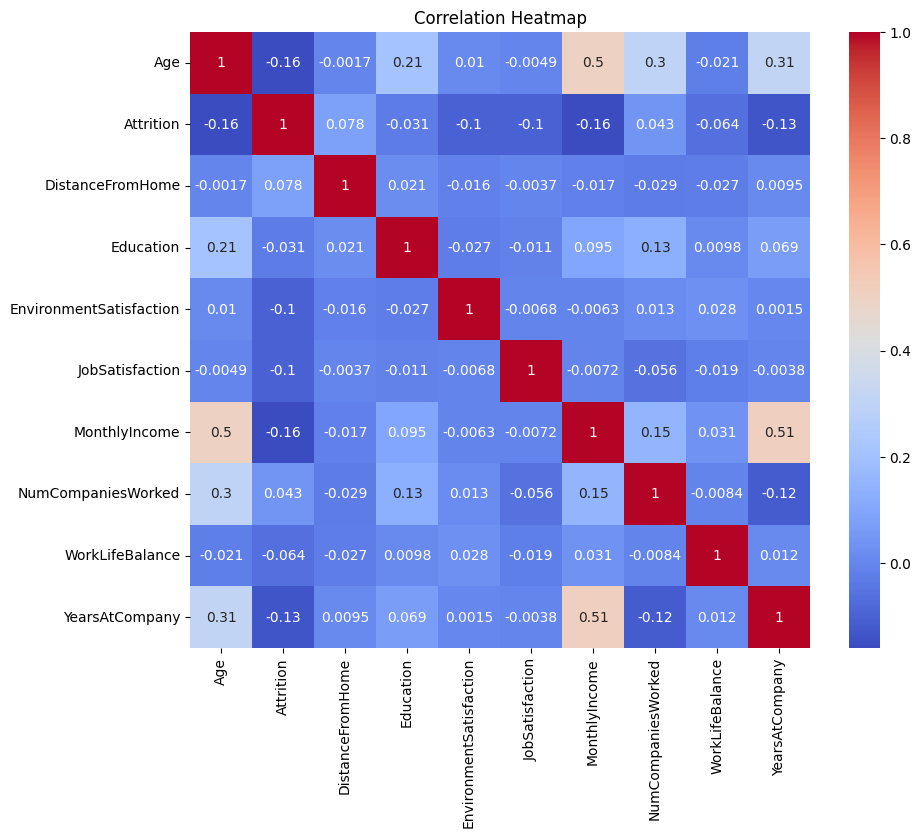

In [ ]:
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



 3: Pre-processing
Encode Categorical Variables:

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Attrition'] = encoder.fit_transform(df['Attrition'])  # Yes/No -> 1/0

# One-hot encode remaining categorical variables
df = pd.get_dummies(df, drop_first=True)


**Feature Scaling:**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


Train-Test Split:

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4: Model Building

Logistic Regression:



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.56      0.13      0.21        39

    accuracy                           0.87       294
   macro avg       0.72      0.56      0.57       294
weighted avg       0.84      0.87      0.83       294



Decision Tree Classifier:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7517006802721088


Random Forest Classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8741496598639455


**Gradient Boosting Classifier:**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8673469387755102


5.Model Evaluation

Confusion Matrix:

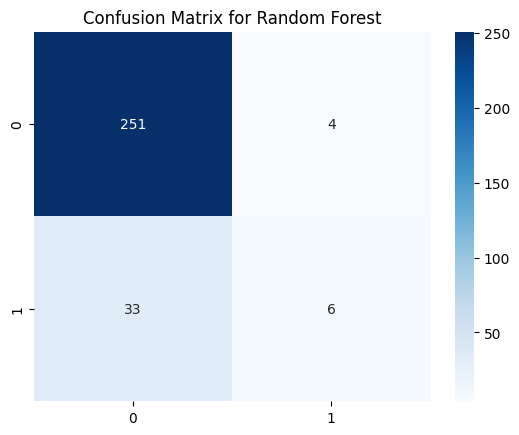

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix for Random Forest")
plt.show()


ROC-AUC Curve

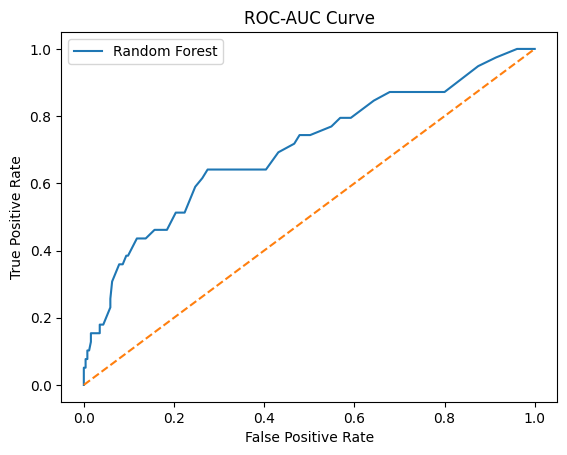

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs_rf = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
